<a href="https://colab.research.google.com/github/Schravenralph/agent-development-kit-crash-course/blob/main/Betrouwbare_Buur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analyse van Buurschapstypen: De Betrouwbare Buur**


Laten we beginnen met het importeren van alle modules en settings die we nodig gaan hebben in onze analyse.


In [ ]:
# Data handling
import numpy as np
import pandas as pd

# Model training and splitting
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Model evaluation
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

# Optional: Configure visualization style
sns.set(style='whitegrid')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Laad vervolgens de data rondom de buurschapsvragenlijst die betrekking heeft op de betrouwbare buur.


In [ ]:
# Wees nauwkeurig! Foutief voorbeeld: filepath = r"UCS Buurschapsproject/De Betrouwbare Buur.csv"
filepath = "/content/drive/My Drive/UCS Buurschapsproject/testdata_betrouwbare_buren.csv"

# CSV-bestand inlezen
df = pd.read_csv(filepath)

Bekijk de eerste 5 observaties.

In [ ]:
df.head(5)

,Respondent ID,Ik zoek graag contact met buurtgenoten.,Ik voel me op mijn gemak tijdens groepsactiviteiten in de buurt.,Ik begin meestal zelf een gesprek met buren.,Ik vind het belangrijk dat de sfeer in de buurt prettig is.,Ik let erop dat mijn gedrag geen anderen stoort.,Ik help graag een buur als die hulp nodig heeft.,Ik vind het interessant om nieuwe ideeën of initiatieven in de buurt uit te proberen.,Ik sta open voor alternatieve manieren om de buurt te organiseren.,Ik neem graag verantwoordelijkheid in buurtprojecten.,"Als ik ergens aan begin, maak ik het ook echt af.","Ik hou me aan afspraken met buren, ook als het lastig uitkomt.",Ik voel me verantwoordelijk als er praktische dingen misgaan in de buurt.,Ik vind het belangrijk dat buurtinitiatieven goed worden uitgevoerd.,Ik hou ervan als taken in de buurt eerlijk verdeeld zijn.,Ik denk vaak vooruit om te zorgen dat dingen soepel verlopen.
0,R1,2,4,4,3,3,4,4,3,3,3,4,2,2,4,4
1,R2,1,3,2,1,1,1,2,2,3,3,2,2,2,2,1
2,R3,2,2,2,3,1,3,1,1,2,3,2,1,2,2,2
3,R4,3,2,1,3,2,1,1,2,3,1,2,1,2,3,1
4,R5,3,3,2,2,3,2,4,4,4,3,3,3,2,2,2


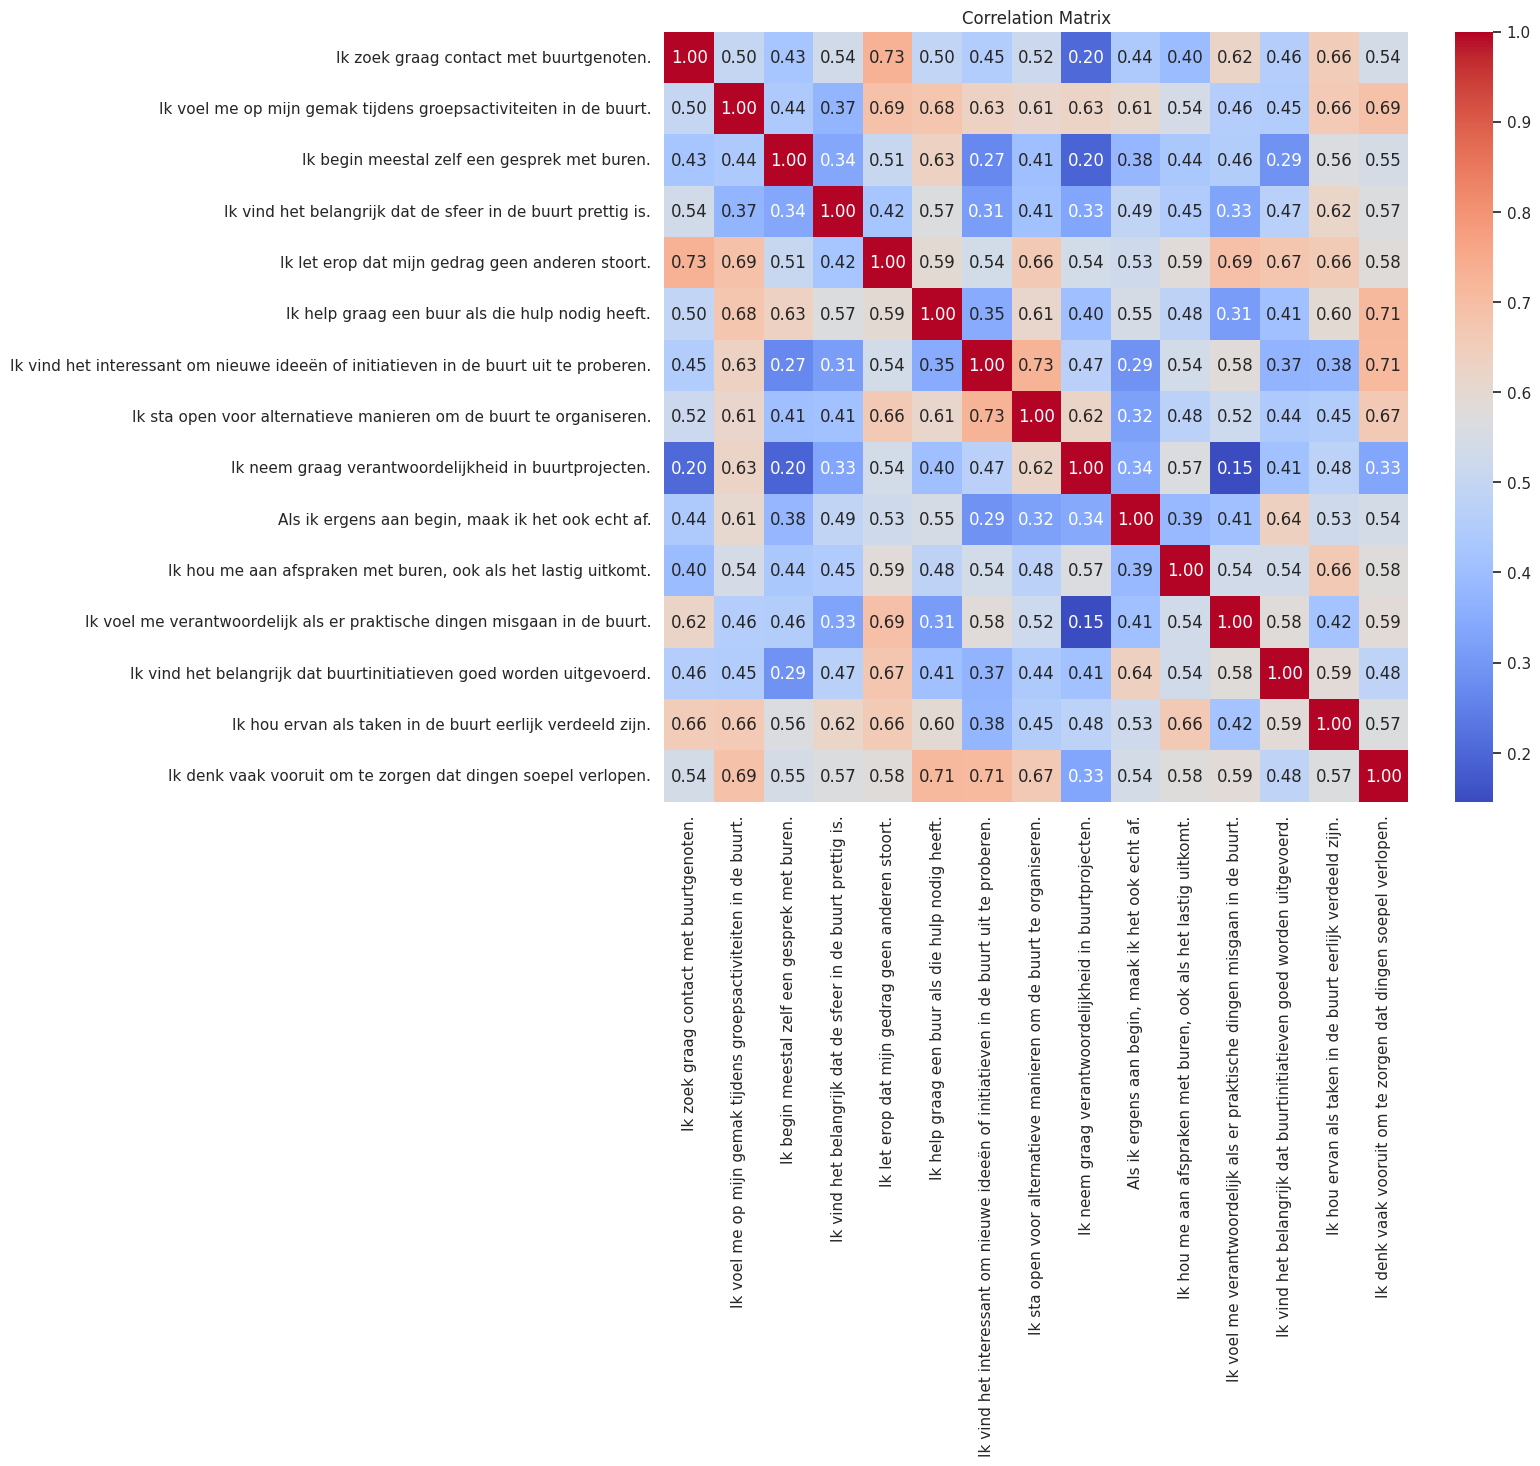

In [ ]:
# Correlation matrix
df_features = df.drop(df.columns[0], axis=1)
df_features.head()

# Compute the correlation matrix
corr_matrix = df_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
import pandas as pd

# Definieer de vraaggroepen per dimensie
dimensies = {
    "extravertie": [
        "Ik zoek graag contact met buurtgenoten.",
        "Ik voel me op mijn gemak tijdens groepsactiviteiten in de buurt.",
        "Ik begin meestal zelf een gesprek met buren."
    ],
    "aanvaardbaarheid": [
        "Ik vind het belangrijk dat de sfeer in de buurt prettig is.",
        "Ik let erop dat mijn gedrag geen anderen stoort.",
        "Ik help graag een buur als die hulp nodig heeft."
    ],
    "openheid": [
        "Ik vind het interessant om nieuwe ideeën of initiatieven in de buurt uit te proberen.",
        "Ik sta open voor alternatieve manieren om de buurt te organiseren."
    ],
    "plichtsgetrouwheid": [
        "Ik neem graag verantwoordelijkheid in buurtprojecten.",
        "Als ik ergens aan begin, maak ik het ook echt af."
    ],
    "betrouwbaarheidstype": [
        "Ik hou me aan afspraken met buren, ook als het lastig uitkomt.",
        "Ik voel me verantwoordelijk als er praktische dingen misgaan in de buurt.",
        "Ik vind het belangrijk dat buurtinitiatieven goed worden uitgevoerd.",
        "Ik hou ervan als taken in de buurt eerlijk verdeeld zijn.",
        "Ik denk vaak vooruit om te zorgen dat dingen soepel verlopen."
    ]
}

# 1. Bereken scores per deelnemer op basis van het gemiddelde per dimensie
for dim, vragen in dimensies.items():
    df[f"{dim}_score"] = df[vragen].mean(axis=1)

# Optioneel: selecteer alleen de relevante scorekolommen
score_kolommen = [f"{dim}_score" for dim in dimensies]
df_scores_only = df[score_kolommen]

# 2. Bekijk het resultaat
df_scores_only.round(1).head()

,extravertie_score,aanvaardbaarheid_score,openheid_score,plichtsgetrouwheid_score,betrouwbaarheidstype_score
0,3.3,3.3,3.5,3.0,3.2
1,2.0,1.0,2.0,3.0,1.8
2,2.0,2.3,1.0,2.5,1.8
3,2.0,2.0,1.5,2.0,1.8
4,2.7,2.3,4.0,3.5,2.4


In [ ]:
# 3. Bereken gemiddelde score per dimensie
for naam, vragen in dimensies.items():
    df[f"{naam}_score"] = df[vragen].mean(axis=1)

# 4. Normaliseer de scores tussen 0 en 1
dim_cols = [f"{dim}_score" for dim in dimensies]
scaler = MinMaxScaler()
norm_scores = norm_scores = scaler.fit_transform(df[[f"{dim}_score" for dim in ["extravertie", "aanvaardbaarheid", "openheid", "plichtsgetrouwheid"]]])
norm_df = pd.DataFrame(norm_scores, columns=[f"{dim}_score" for dim in ["extravertie", "aanvaardbaarheid", "openheid", "plichtsgetrouwheid"]])


# 5. Definieer de ideale hoekpunten voor elk buurtype
idealen = {
    "Spontane Buur":     np.array([1, 0, 0, 0]),
    "Zorgzame Buur":     np.array([0, 1, 0, 0]),
    "Vernieuwende Buur": np.array([0, 0, 1, 0]),
    "Betrouwbare Buur":  np.array([0, 0, 0, 1])
}

# 6. Bereken afstand tot elk buurtype en omzetten naar nabijheidswaarde
buurtype_scores = []
for row in norm_scores:
    scores = []
    for ideaal in idealen.values():
        dist = np.linalg.norm(row - ideaal)
        nabijheid = 1 - dist  # hoe dichterbij, hoe hoger
        scores.append(nabijheid)
    buurtype_scores.append(scores)

buurtype_df = pd.DataFrame(buurtype_scores, columns=idealen.keys())

# 7. Combineer alles in één DataFrame
#result_df = pd.concat([df.reset_index(drop=True), norm_df, buurtype_df], axis=1)
result_df = pd.concat([norm_df.reset_index(drop=True), buurtype_df.reset_index(drop=True)], axis=1)

# 8. Resultaat
# print(result_df[[*dim_cols, *idealen.keys()]].round(2).head())  # voorbeeldweergave
result_df.round(2).head(15)

,extravertie_score,aanvaardbaarheid_score,openheid_score,plichtsgetrouwheid_score,Spontane Buur,Zorgzame Buur,Vernieuwende Buur,Betrouwbare Buur
0,0.56,0.7,0.62,0.67,-0.23,-0.11,-0.18,-0.14
1,0.11,0.0,0.25,0.67,-0.14,-0.23,-0.01,0.57
2,0.11,0.4,0.00,0.50,-0.10,0.21,-0.19,0.35
3,0.11,0.3,0.12,0.33,-0.00,0.21,0.01,0.25
4,0.33,0.4,0.75,0.83,-0.36,-0.31,-0.01,0.07
5,0.56,0.4,0.38,0.67,0.03,-0.12,-0.14,0.15
6,0.78,0.8,0.62,0.83,-0.33,-0.32,-0.44,-0.29
7,0.56,0.5,0.50,0.33,0.10,0.04,0.04,-0.12
8,0.44,0.7,1.00,0.67,-0.50,-0.32,-0.06,-0.34
9,0.78,1.0,1.00,0.83,-0.66,-0.52,-0.52,-0.62


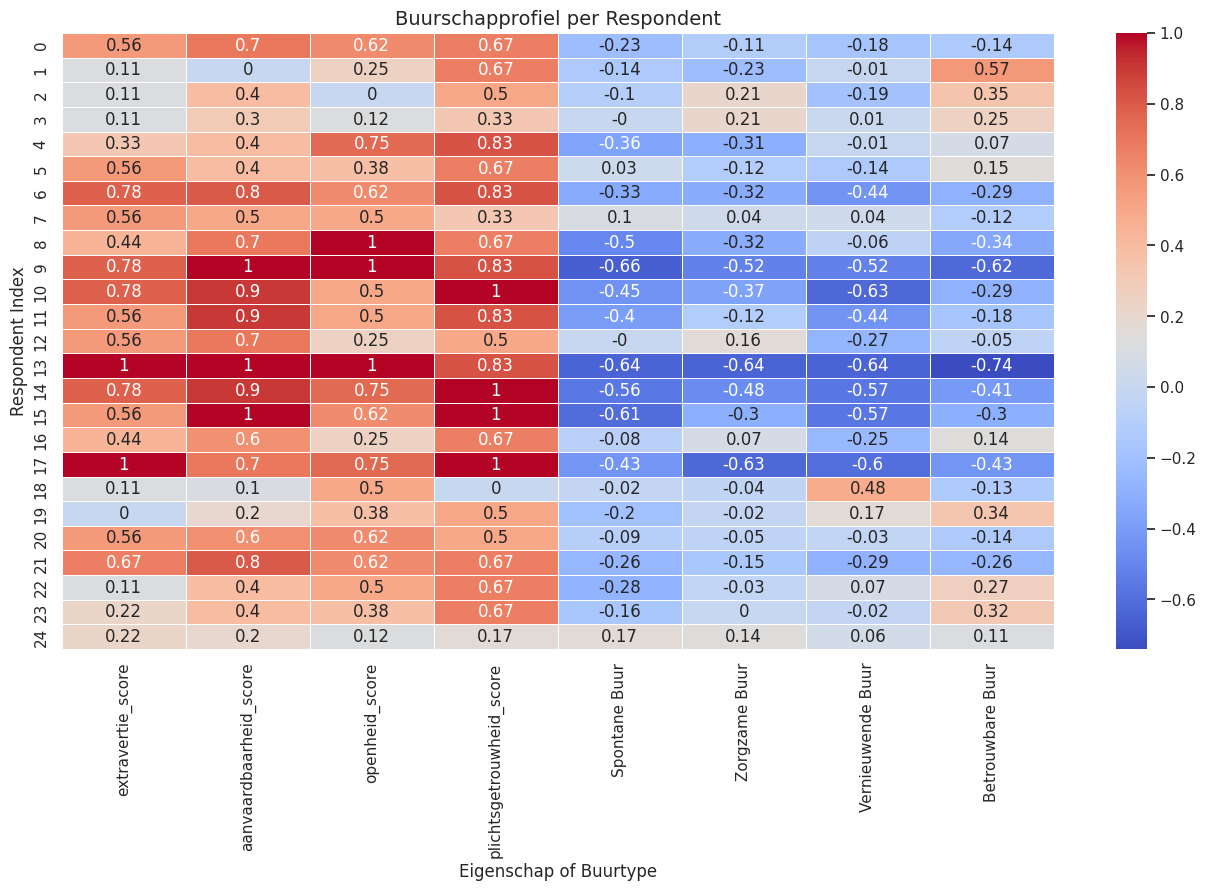

In [ ]:

# 🔥🔥 9 🔥🔥 -  HEATMAP VISUALISATIE
fig_width = 16
fig_height = 8
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(result_df.round(2), annot=True, cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Buurschapprofiel per Respondent", fontsize=14)
plt.xlabel("Eigenschap of Buurtype")
plt.ylabel("Respondent Index")
#plt.tight_layout()
plt.show()

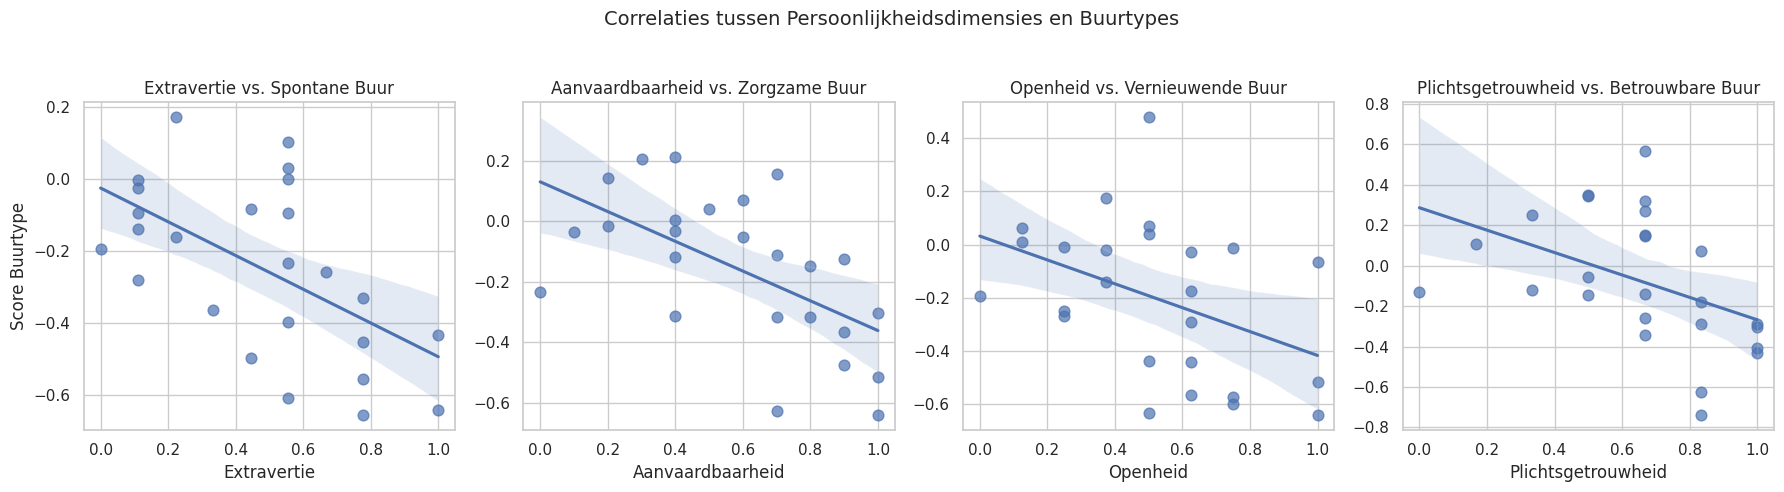

In [ ]:
# === 6. Correlatieplots per dimensie & bijbehorend buurtype ===
dimensies_overig = ["extravertie_score", "aanvaardbaarheid_score", "openheid_score", "plichtsgetrouwheid_score"]
koppeling = {
    "extravertie_score": "Spontane Buur",
    "aanvaardbaarheid_score": "Zorgzame Buur",
    "openheid_score": "Vernieuwende Buur",
    "plichtsgetrouwheid_score": "Betrouwbare Buur"
}

# === 7. Plotten ===
plt.figure(figsize=(18, 5))

for i, dim in enumerate(dimensies_overig):
    plt.subplot(1, 4, i + 1)
    x = result_df[dim].values.flatten()
    y = result_df[koppeling[dim]].values.flatten()

    sns.regplot(
        x=x,
        y=y,
        ci=95,
        scatter_kws={'s': 60, 'alpha': 0.7}
    )
    plt.title(f"{dim.replace('_score', '').capitalize()} vs. {koppeling[dim]}")
    plt.xlabel(dim.replace("_score", "").capitalize())
    plt.ylabel("Score Buurtype" if i == 0 else "")
    plt.grid(True)

plt.suptitle("Correlaties tussen Persoonlijkheidsdimensies en Buurtypes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<ipython-input-87-1016096463>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))


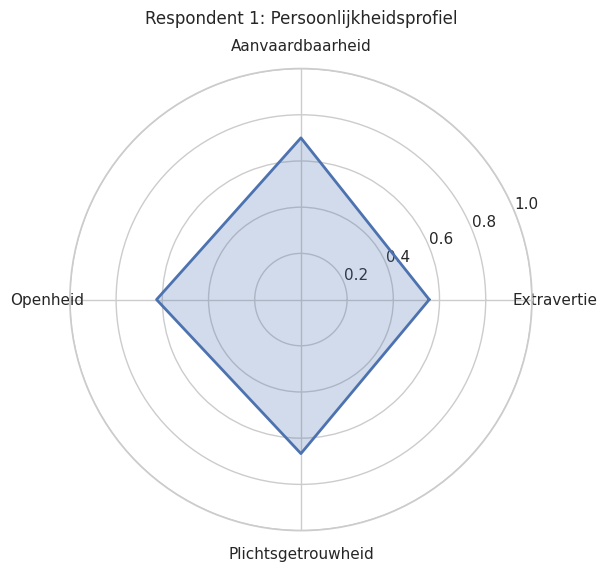

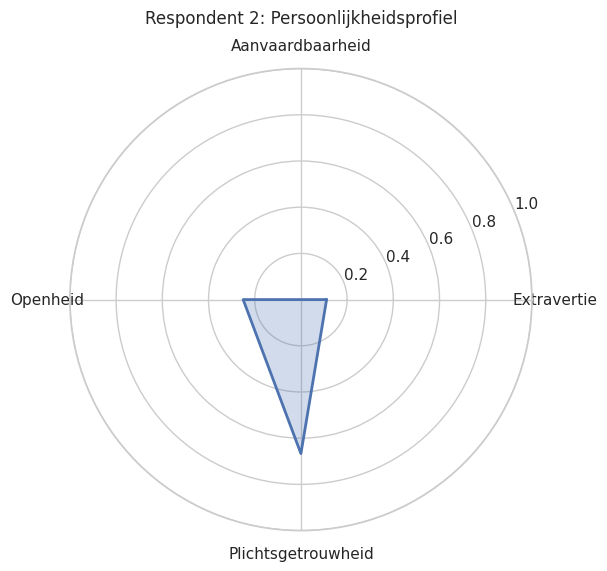

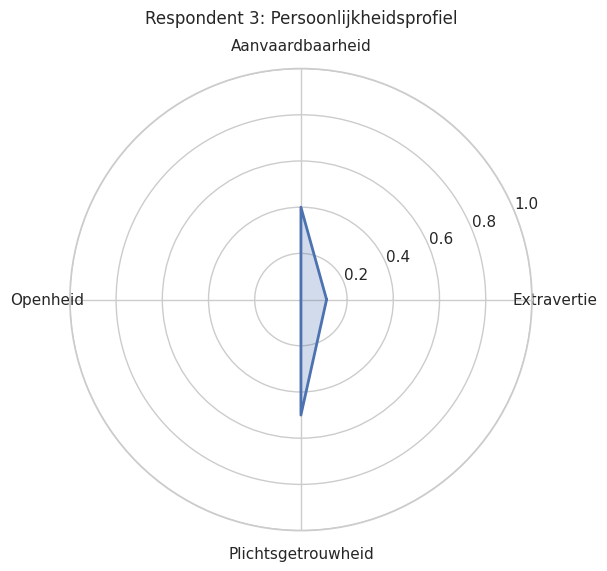

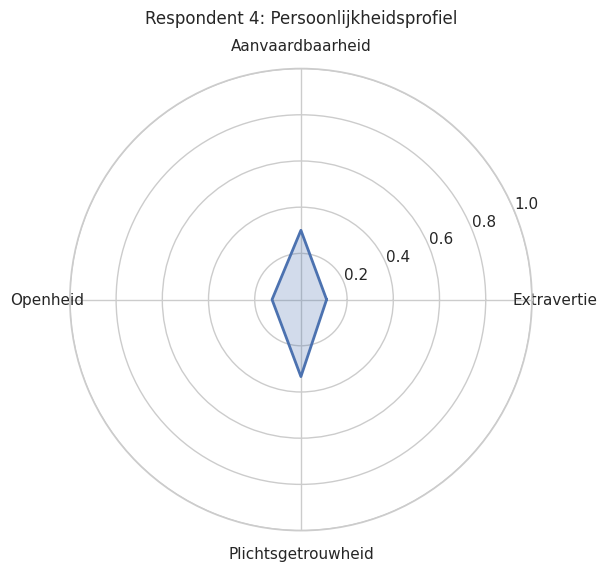

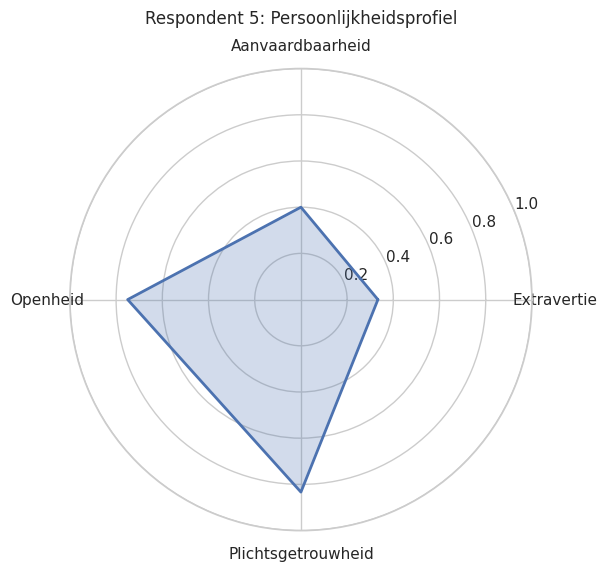

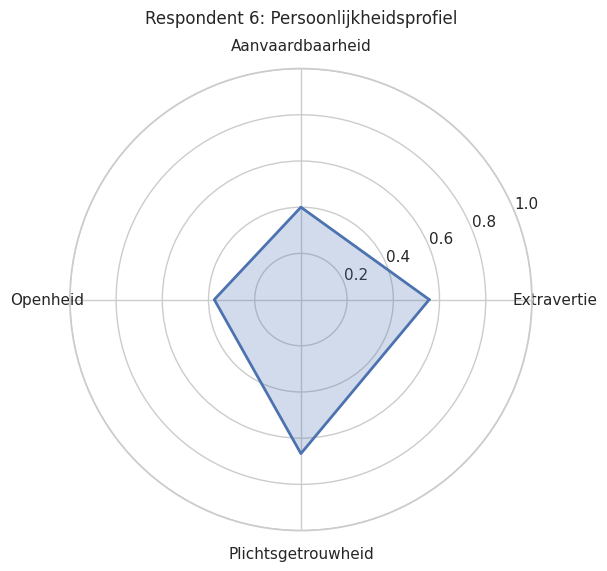

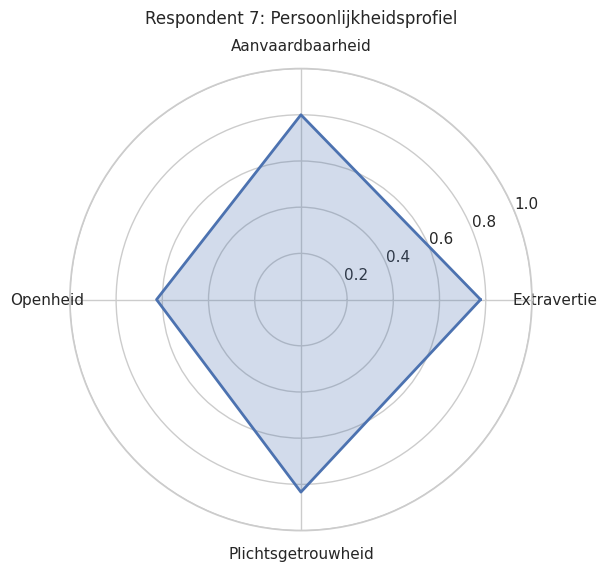

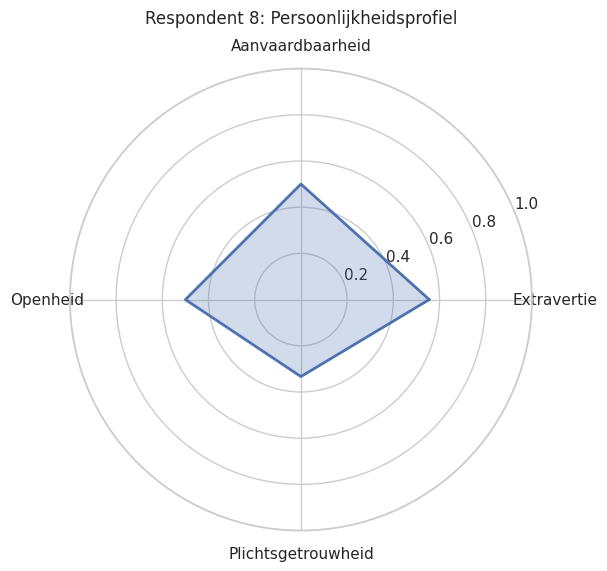

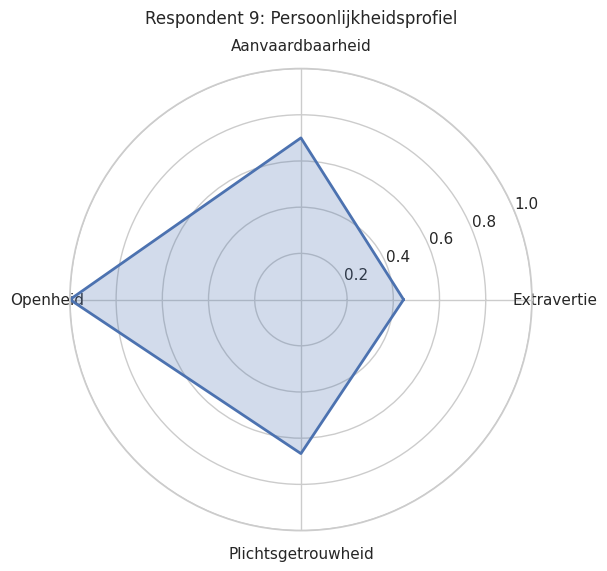

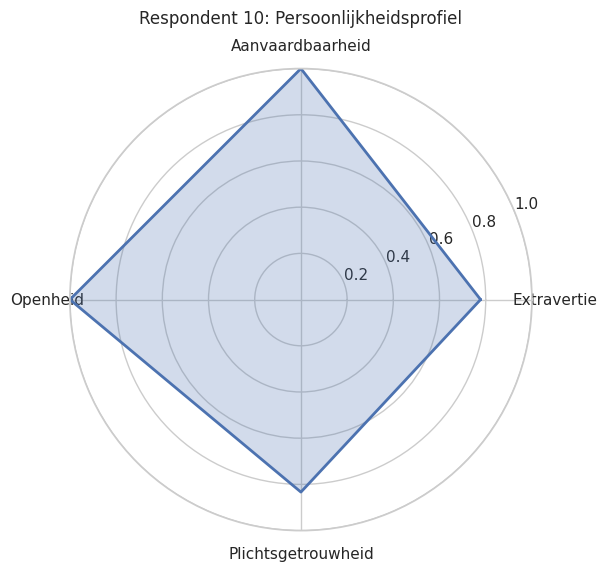

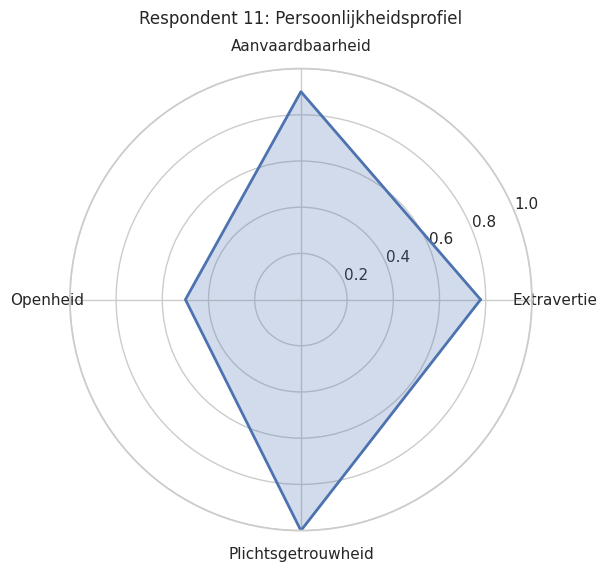

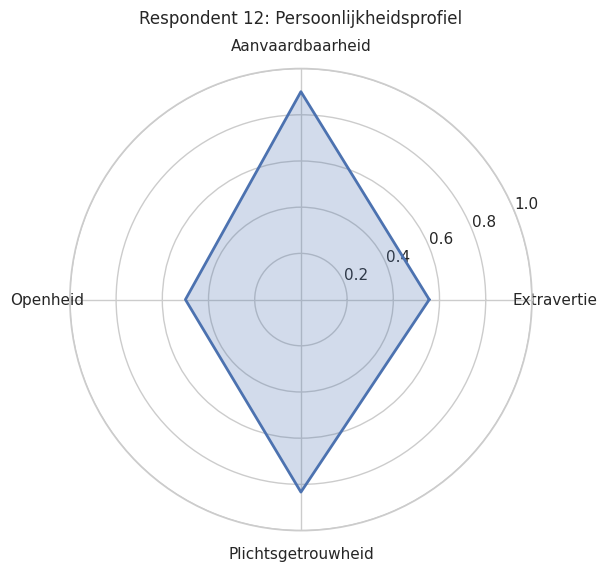

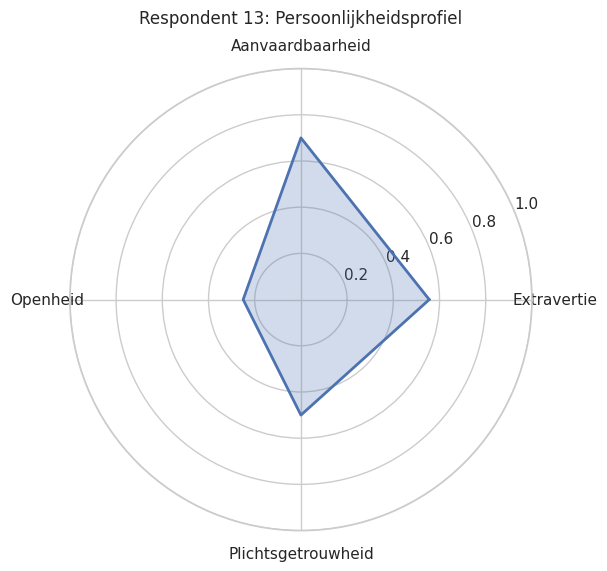

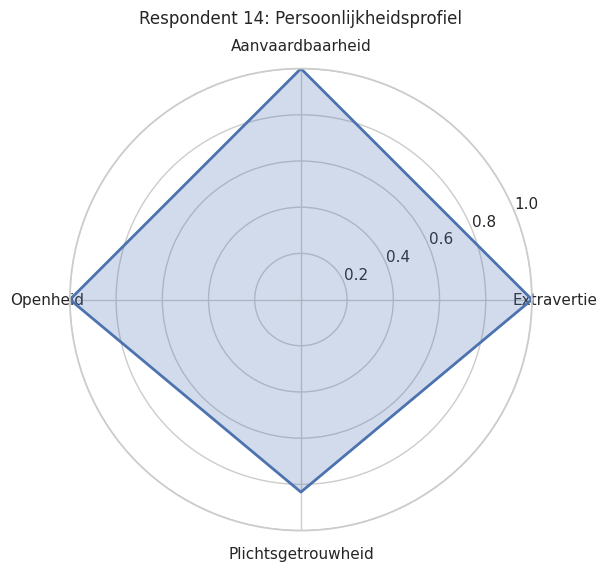

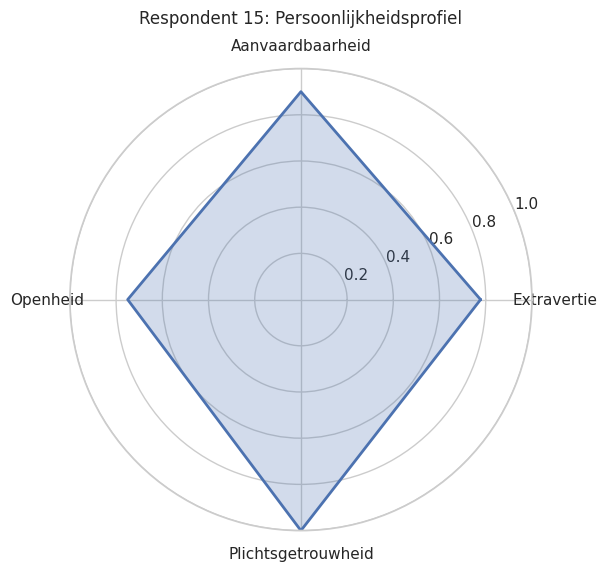

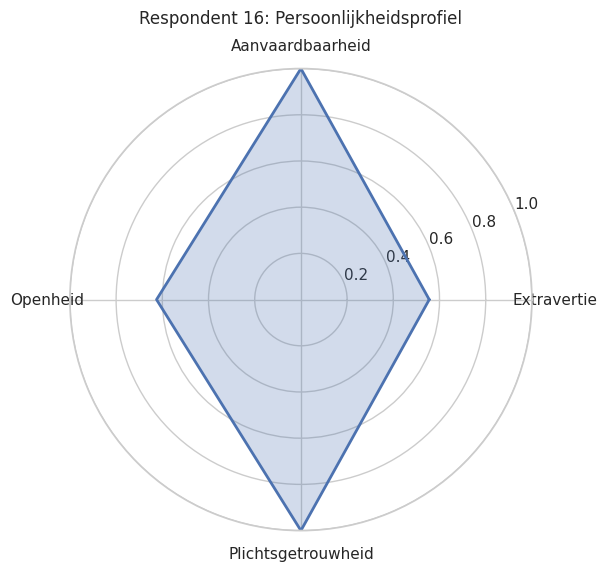

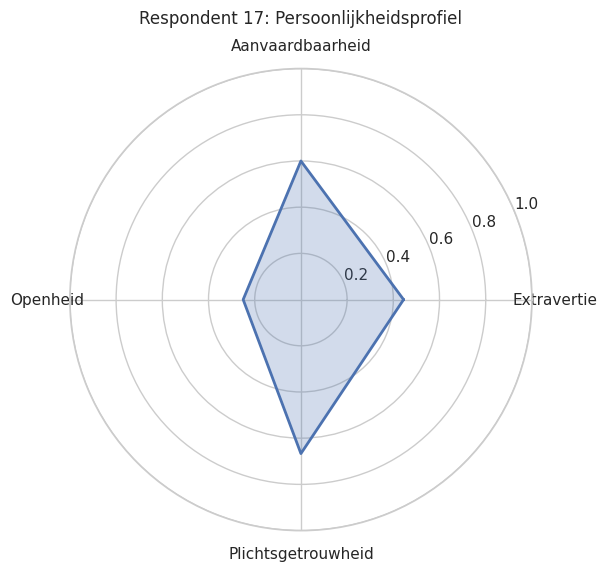

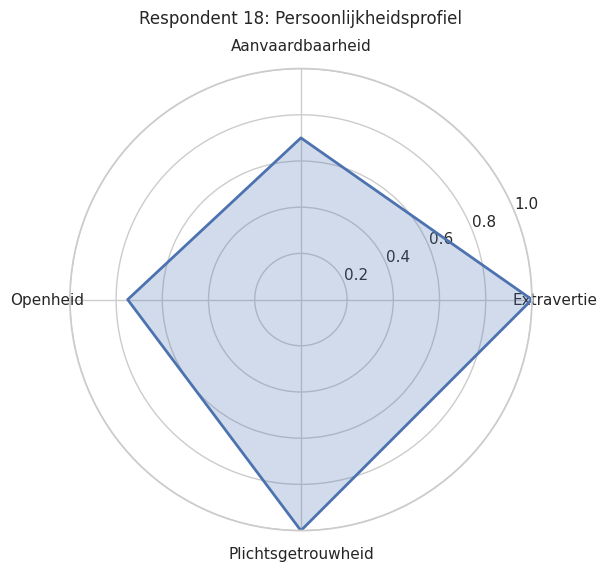

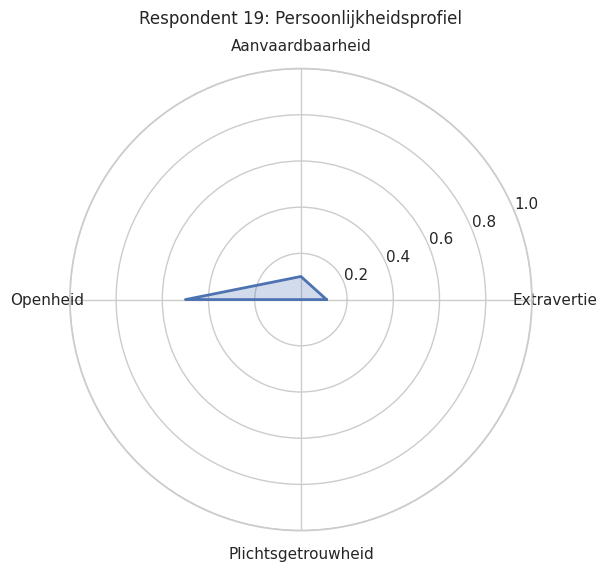

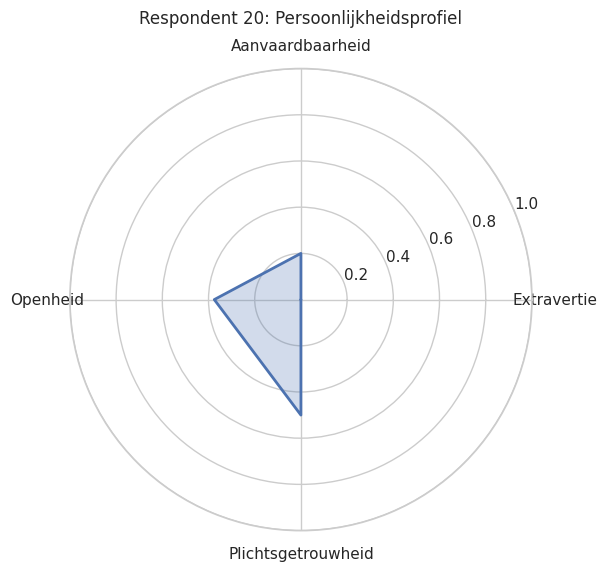

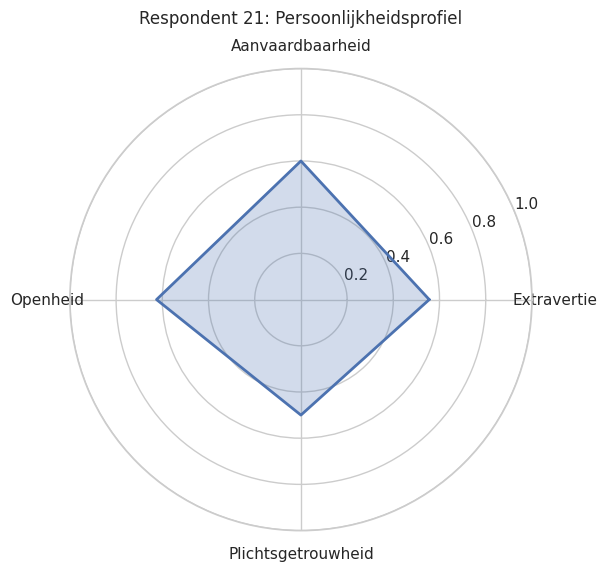

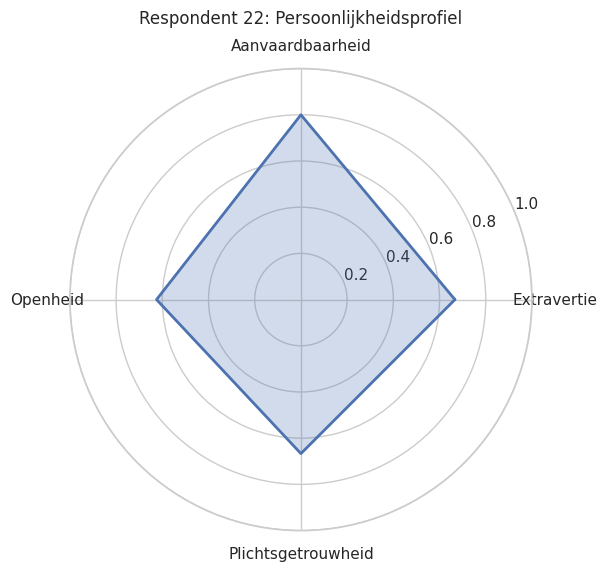

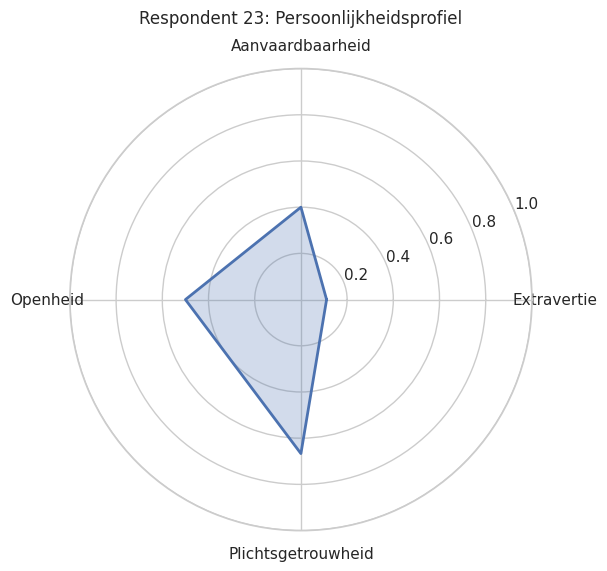

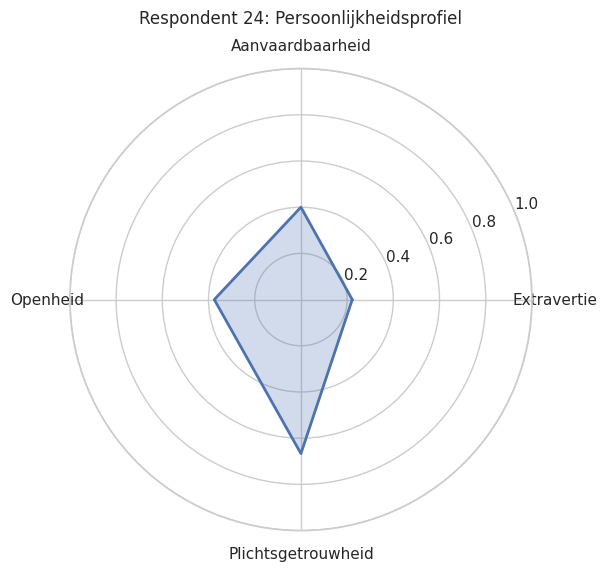

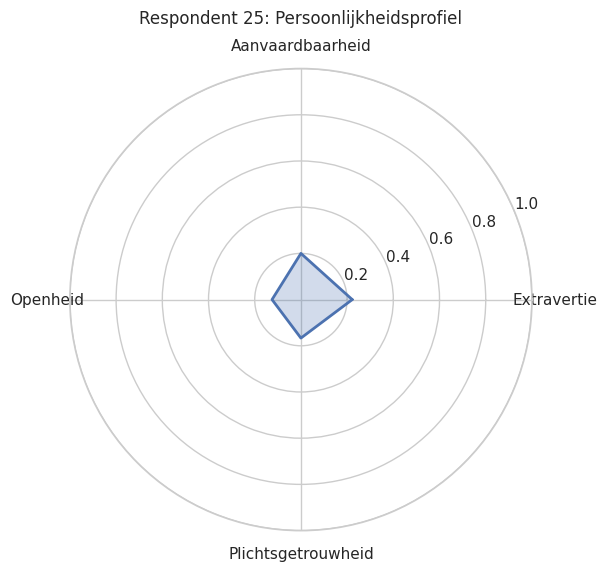

In [ ]:
dim_names = dimensies_overig

# Stel DISC-achtige vierkwadrant-visualisatie op
labels = ["Extravertie", "Aanvaardbaarheid", "Openheid", "Plichtsgetrouwheid"]

# Posities op een cirkel
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # sluit de cirkel

# Maak voor elke respondent een "DISC-stijl" radarplot
for i, row in result_df.iterrows():
    values = row[["extravertie_score", "aanvaardbaarheid_score", "openheid_score", "plichtsgetrouwheid_score"]].tolist()
    values += values[:1]  # sluit de lijn

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Plot de lijn
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.25)

    # Labels instellen
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title(f"Respondent {i+1}: Persoonlijkheidsprofiel", y=1.08)
    ax.set_ylim(0, 1)
    ax.grid(True)

    # Optioneel: opslaan
    plt.savefig(f"respondent_{i+1}_disc_style.png")

    # Optioneel: niet tonen in browser-uitvoer
    #plt.close(fig)


Dat was het!